In [1]:
# THIS IS THE testForDoseSystem FUNCTION DEFINITION
#  SHOULD WORK FOR ALL CASES (2 TABS, 3 TABS, 4 TABS, ...)
#  NEED TO UPDATE THE INPUTS SECTION EVERY TIME THOUGH

import numpy as np # import numpy

# INPUTS
minDose = 50 # lowest dose to be administered to patients
maxDose = 150 # largest dose to be administered to patients
lowestManufacturableTabletStrength = 20

#PARAMETERS
smallestPenaltyTabletSize = 0.01
# Set the above value to 1 to revert to a classic change making problem, and change minDose to 1 and maxDose to 99



def testForDoseSystem(doseFaceValues): # function to test for i value(s) to see the average coins returned

#     print(doseFaceValues)
    bestSolutionGlobal = np.zeros(maxDose+1) # bestSolutionGlobal is a table that goes up to the smallestBillValue
    tabletsInSolution = np.zeros( (maxDose+1, len(doseFaceValues)) )
    
    bestSolutionGlobal[0] = 0 # setting bestSolutionGlobal at point 0 to 0
    tabletsInSolution[0] = np.zeros( len(doseFaceValues) )
    
    for changeValue in range(1,maxDose+1): # changeValue goes from 1 to 99 in changeValueList

        #print("ChangeValue:", changeValue)
        # Input
        #inputvalue = changeValue # inputvalue is changevalue

        #change = int(inputvalue) # change is inputvalue as an integer

        #Initialize Variables for if and while statements
        remainingAmount = changeValue # remainingAmount is chabge

        # Math
        dosesReturned = np.zeros(len(doseFaceValues)) # makes a table that is the same length as doseFaceValues
        bestSolution = 9e99
        for i in range(len(doseFaceValues) - 1, -1, -1):
            if changeValue >= doseFaceValues[i]:
                if i == 0 :
                    dosesReturned[i] = abs(1/doseFaceValues[i]) + bestSolutionGlobal[changeValue-1]
                else:
                    dosesReturned[i] = 1 + bestSolutionGlobal[changeValue-doseFaceValues[i]]
            else:
                dosesReturned[i] = 1e6
            
            if dosesReturned[i] <= bestSolution:
                bestSolution = dosesReturned[i]
                
                if i == 0: #if this is the penalty tablet
                    tabletsInSolution[changeValue] = tabletsInSolution[changeValue-1]
                    tabletsInSolution[changeValue,i] = tabletsInSolution[changeValue,i] + abs(1/doseFaceValues[i])
                else: 
                    tabletsInSolution[changeValue] = tabletsInSolution[changeValue-doseFaceValues[i]]
                    tabletsInSolution[changeValue,i] = tabletsInSolution[changeValue,i] + 1
                    
        bestSolutionGlobal[changeValue] = int(bestSolution)



    mean = np.mean( bestSolutionGlobal[minDose:maxDose+1] )

    return [mean, bestSolutionGlobal, tabletsInSolution ]

print('Completed first block')


Completed first block


In [2]:
# THIS IS THE MAIN CODE THAT DOES THE CALCULATIONS FOR BEST SOLUTION
#  NEEDS TO BE UPDATED FOR DIFFERENT CASES (2 TABS, 3 TABS, 4 TABS, ...)
#  It also stores all the solutions in the averageTabletsForStrengthCombo


# averageTabletsForStrengthCombo = np.zeros((maxDose+1, maxDose+1, maxDose+1, maxDose+1, maxDose+1))

numTabletDoses = 5 # plus the penalty
averageTabletsForStrengthCombo_topN = np.zeros( (1, 1+numTabletDoses+1) ) 
    # colm 0 holds smallestPenaltyTabletSize, colm1 holds dose1, colm 2 holds dose 2, ..., 
    #   colm 4 holds the averageTabletsForStrengthCombo
averageTabletsForStrengthCombo_topN[0,numTabletDoses+1] = 1e9

    
minAverageDosage = 1e9

bestFirstDose = -99
bestSecondDose = -99
bestThirdDose = -99 
bestFourthDose = -99 
bestFifthDose = -99 # store a junk value


for dose1 in range(lowestManufacturableTabletStrength, maxDose+1):
    print('[dose1,dose2,dose3,dose4] = ', dose1, ', {subcombos}, {subcombos}, {subcombos}, {subcombos}')
    for dose2 in range(dose1 + 1, maxDose+1):
        for dose3 in range(dose2 + 1, maxDose+1):
            for dose4 in range(dose3 + 1, maxDose + 1):
                for dose5 in range(dose4 + 1, maxDose + 1):
            
                    doseFaceValues = [smallestPenaltyTabletSize, dose1, dose2, dose3, dose4, dose5]

                    [ averageTabletsForStrengthCombo, bestSolution, tabletsInSolution ] \
                        = testForDoseSystem(doseFaceValues)

                    if averageTabletsForStrengthCombo < minAverageDosage:
                        print("Lower Average Dose Found! ", dose1, dose2, dose3, dose4, dose5)
                        minAverageDosage = averageTabletsForStrengthCombo
                        bestFirstDose = dose1
                        bestSecondDose = dose2
                        bestThirdDose = dose3
                        bestFourthDose = dose4
                        bsetFifthDose = dose5

                    for i in range(averageTabletsForStrengthCombo_topN.shape[0]):
                        if i >= 20: 
                            break
                        if averageTabletsForStrengthCombo < averageTabletsForStrengthCombo_topN[i,numTabletDoses+1]:
                            averageTabletsForStrengthCombo_topN = np.insert( averageTabletsForStrengthCombo_topN, i, 99, axis=0 )
                            averageTabletsForStrengthCombo_topN[i,0] = smallestPenaltyTabletSize
                            averageTabletsForStrengthCombo_topN[i,1] = dose1
                            averageTabletsForStrengthCombo_topN[i,2] = dose2
                            averageTabletsForStrengthCombo_topN[i,3] = dose3
                            averageTabletsForStrengthCombo_topN[i,4] = dose4
                            averageTabletsForStrengthCombo_topN[i,5] = dose5
                            averageTabletsForStrengthCombo_topN[i,6] = averageTabletsForStrengthCombo
                            #print( '-----------------------')
                            #print( averageTabletsForStrengthCombo_topN )
                            #print( '-----------------------\n')
                            break
            
                    for i in range(averageTabletsForStrengthCombo_topN.shape[0]-1, 20, -1):
                        averageTabletsForStrengthCombo_topN = np.delete( averageTabletsForStrengthCombo_topN, i, axis=0 )
            #averageTabletsForStrengthCombo_topN = np.delete( averageTabletsForStrengthCombo_topN, averageTabletsForStrengthCombo_topN.shape[0] - 1, axis=0)
                    
# print("Average Dose Table:")
# print(averageTabletsForStrengthCombo)
# plt.show()

print("")
print("The lowest average dosage is:", minAverageDosage)
print("The best dosage combination is", bestFirstDose, bestSecondDose, bestThirdDose, bestFourthDose, bestFifthDose, \
      ' mg tablets, along with a impractical ', smallestPenaltyTabletSize, ' mg "penalty" tablet')
    
# np.set_printoptions(suppress=True)
for i in range( averageTabletsForStrengthCombo_topN.shape[0] ): 
#     print( averageTabletsForStrengthCombo_topN[i])
    print( "%d [%f, %f, %f, %f, %f, %f] :: %f" % (i, averageTabletsForStrengthCombo_topN[i,0], \
                                        averageTabletsForStrengthCombo_topN[i,1], \
                                        averageTabletsForStrengthCombo_topN[i,2], \
                                        averageTabletsForStrengthCombo_topN[i,3], \
                                        averageTabletsForStrengthCombo_topN[i,4], \
                                        averageTabletsForStrengthCombo_topN[i,5], \
                                        averageTabletsForStrengthCombo_topN[i,6] ))

# print( averageTabletsForStrengthCombo_topN )




[dose1,dose2,dose3,dose4] =  20 , {subcombos}, {subcombos}, {subcombos}, {subcombos}
Lower Average Dose Found!  20 21 22 23 24
Lower Average Dose Found!  20 21 22 23 25
Lower Average Dose Found!  20 21 22 23 26
Lower Average Dose Found!  20 21 22 23 27
Lower Average Dose Found!  20 21 22 23 28
Lower Average Dose Found!  20 21 22 24 28
Lower Average Dose Found!  20 21 22 24 29
Lower Average Dose Found!  20 21 22 25 29
Lower Average Dose Found!  20 21 22 25 31
Lower Average Dose Found!  20 21 22 25 32
Lower Average Dose Found!  20 21 22 25 33
Lower Average Dose Found!  20 21 22 27 29
Lower Average Dose Found!  20 21 22 29 34
Lower Average Dose Found!  20 21 23 27 29
Lower Average Dose Found!  20 21 23 29 33
Lower Average Dose Found!  20 21 23 29 34
Lower Average Dose Found!  20 21 25 32 34
[dose1,dose2,dose3,dose4] =  21 , {subcombos}, {subcombos}, {subcombos}, {subcombos}
[dose1,dose2,dose3,dose4] =  22 , {subcombos}, {subcombos}, {subcombos}, {subcombos}
[dose1,dose2,dose3,dose4] =  23

KeyboardInterrupt: 

In [ ]:
# Save Values to Pickle File

import pickle

pickle.dump( minAverageDosage, open( "minAverageDosage5.p", "wb" ) )
pickle.dump( bestFirstDose, open( "minAverageDosage5.p", "wb" ) )
pickle.dump( bestSecondDose, open( "minAverageDosage5.p", "wb" ) )
pickle.dump( bestThirdDose, open( "minAverageDosage5.p", "wb" ) )
pickle.dump( bestFourthDose, open( "minAverageDosage5.p", "wb" ) )
pickle.dump( bestFifthDose, open( "minAverageDosage5.p", "wb" ) )
pickle.dump( smallestPenaltyTabletSize, open( "minAverageDosage5.p", "wb" ) )

In [ ]:
# Load Values from Pickle File

import pickle

minAverageDosage = pickle.load( open( "minAverageDosage5.p", "rb" ) )
bestFirstDose = pickle.load( open( "minAverageDosage5.p", "rb" ) )
bestSecondDose = pickle.load( open( "minAverageDosage5.p", "rb" ) )
bestThirdDose = pickle.load( open( "minAverageDosage5.p", "rb" ) )
bestFourthDose = pickle.load( open( "minAverageDosage5.p", "rb" ) )
bestFifthDose = pickle.load( open( "minAverageDosage5.p", "rb" ) )
smallestPenaltyTabletSize = pickle.load( open( "minAverageDosage5.p", "rb" ) )


bestDoseFaceValues =  [1, 5, 18, 25]  mg tablets
bestSolution =  [0. 1. 2. 3. 4. 1. 2. 3. 4. 5. 2. 3. 4. 5. 6. 3. 4. 5. 1. 2. 3. 4. 5. 2.
 3. 1. 2. 3. 3. 4. 2. 3. 4. 4. 5. 3. 2. 3. 4. 5. 4. 3. 4. 2. 3. 4. 4. 5.
 3. 4. 2. 3. 4. 4. 3. 3. 4. 5. 5. 4. 4. 3. 4. 5. 5. 5. 4. 5. 3. 4. 5. 5.
 4. 4. 5. 3. 4. 5. 5. 4. 4. 5. 6. 6. 5. 5. 4. 5. 6. 6. 5. 5. 6. 4. 5. 6.
 6. 5. 5. 6.]


findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Times New Roman'] not found. 

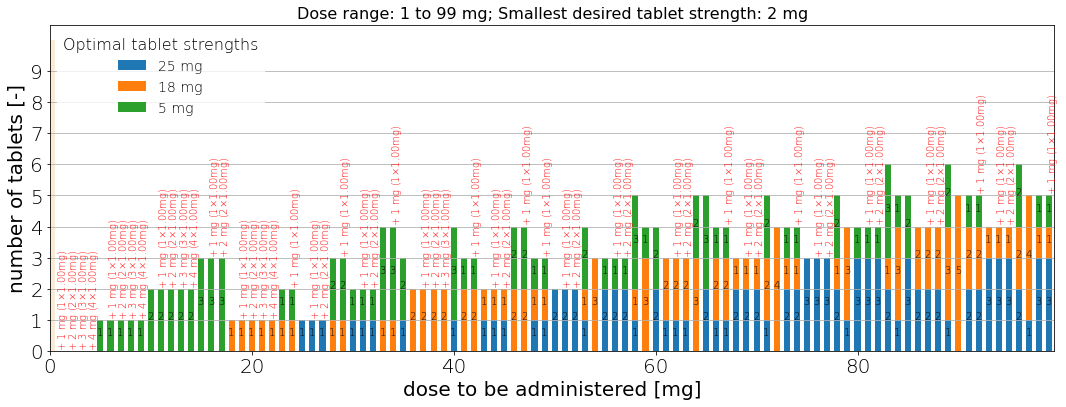

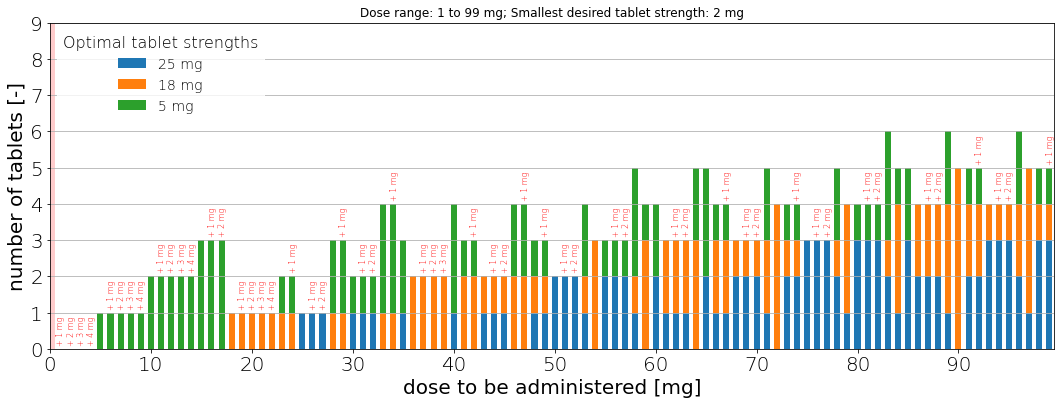

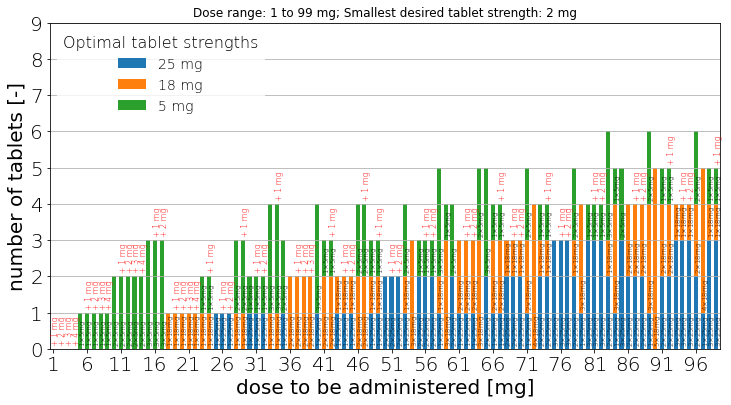

In [11]:
# THIS IS THE BLOCK FOR PLOTTING

import matplotlib.pyplot as plt # matplotlib for drawing graph
import matplotlib.patches as patches
%matplotlib inline

# rerun the base case and obtain the solution for plotting later
bestDoseFaceValues = [smallestPenaltyTabletSize, bestFirstDose, bestSecondDose, bestThirdDose]
[bestDoseMean, bestSolution, tabletsInSolution] = testForDoseSystem(bestDoseFaceValues)


print('bestDoseFaceValues = ', bestDoseFaceValues, ' mg tablets')
print('bestSolution = ', bestSolution)
print('\n')
# for i in range(maxDose+1):
#     print(i, tabletsInSolution[i])


# pretty up the plot
plt.rcParams["figure.figsize"] = [18,6]
plt.rcParams['font.size'] = 20
plt.rcParams['font.weight'] = 'light'
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['legend.title_fontsize'] = 16

plt.figure(1)

barWidth = 0.6

rect = patches.Rectangle((0,0), minDose-0.5, 10, edgecolor='none', facecolor='#efb261', alpha=0.25)
ax = plt.gca()
ax.add_patch(rect)

startHeight = np.zeros( maxDose+1 )
for i in range( len(bestDoseFaceValues)-1, -1, -1 ): 
    if i == 0: 
        labelStr = '%.2f mg' % (bestDoseFaceValues[i])
    else:
        labelStr = '%d mg' % (bestDoseFaceValues[i])
    
    if i > 0:
        plt.bar( range(0,maxDose+1), tabletsInSolution[:,i], barWidth, bottom=startHeight, label=labelStr ); 
    
    for j in range(0,maxDose+1):
        if tabletsInSolution[j,i] > 0 :
            if i == 0:
                strTab = '+ %d mg (%d$\\times$%.2fmg)' % (tabletsInSolution[j,i]*bestDoseFaceValues[i], tabletsInSolution[j,i], bestDoseFaceValues[i])
                plt.text( j-barWidth*0.6, startHeight[j]+0.15, strTab, fontsize=10, rotation='90', color='r' )

            else:
                strTab = '%d' %(  tabletsInSolution[j,i] )
                plt.text( j-barWidth*0.6, startHeight[j]+0.5*tabletsInSolution[j,i], strTab, fontsize=10 )
                
    
    startHeight = np.add( startHeight, tabletsInSolution[:,i] )
    

plt.xlim(0, maxDose+0.5 )
# plt.xticks( np.arange(0,maxDose+1,step=5) )
plt.xlabel('dose to be administered [mg]')
plt.ylabel('number of tablets [-]')

plt.legend()
plt.legend( prop={'size': 14}, edgecolor='w', loc='upper left', title='Optimal tablet strengths' )
plt.yticks( np.arange(0,10) )
# plt.ylim(0,7)

plt.grid(axis='y')

titleStr = 'Dose range: %d to %d mg; Smallest desired tablet strength: %d mg' % \
    ( minDose, maxDose, lowestManufacturableTabletStrength )
plt.title( titleStr, fontsize=16)

plt.savefig('temp1.pdf', bbox_inches='tight')




plt.figure(2)

barWidth = 0.6

rect = patches.Rectangle((0,0), minDose-0.5, 50, edgecolor='none', facecolor='#ff0000', alpha=0.2)
ax = plt.gca()
ax.add_patch(rect)

startHeight = np.zeros( maxDose+1 )
for i in range( len(bestDoseFaceValues)-1, -1, -1 ): 
    if i == 0: 
        labelStr = '%.2f mg' % (bestDoseFaceValues[i])
    else:
        labelStr = '%d mg' % (bestDoseFaceValues[i])
    
    if i > 0:
        plt.bar( range(0,maxDose+1), tabletsInSolution[:,i], barWidth, bottom=startHeight, label=labelStr ); 
    
    for j in range(0,maxDose+1):
        if tabletsInSolution[j,i] > 0 :
            if i == 0:
                strTab = '+ %d mg' % (tabletsInSolution[j,i]*bestDoseFaceValues[i])
                plt.text( j-barWidth*0.6, startHeight[j]+0.15, strTab, fontsize=8, rotation='90', color='r' )

            else:
                strTab = '%d' %(  tabletsInSolution[j,i] )
                #plt.text( j-barWidth*0.6, startHeight[j]+0.5*tabletsInSolution[j,i], strTab, fontsize=9 )
                
    
    startHeight = np.add( startHeight, tabletsInSolution[:,i] )
    

plt.xlim(0, maxDose+0.5 )
plt.xticks( np.arange(0,maxDose+1,step=10) )
plt.xlabel('dose to be administered [mg]')
plt.ylabel('number of tablets [-]')

plt.legend()
plt.legend( prop={'size': 14}, edgecolor='w', loc='upper left', title='Optimal tablet strengths' )
plt.yticks( np.arange(0,10) )
plt.ylim(0,9)

plt.grid(axis='y')

titleStr = 'Dose range: %d to %d mg; Smallest desired tablet strength: %d mg' % \
    ( minDose, maxDose, lowestManufacturableTabletStrength )
plt.title( titleStr, fontsize=12)

filename = 'DoseRange%dto%dmg-smallestStrength%dmg-0toMaxDose-optimal(%d,%d,%d)mg.pdf' \
  % ( minDose, maxDose, lowestManufacturableTabletStrength, \
      bestDoseFaceValues[1], bestDoseFaceValues[2], bestDoseFaceValues[3] )
plt.savefig(filename, bbox_inches='tight')




plt.rcParams["figure.figsize"] = [12,6]

plt.figure(3)

barWidth = 0.6

# rect = patches.Rectangle((minDose-0.5,0), maxDose-minDose+5, 10, edgecolor='none', facecolor='#ffff00', alpha=0.25)
# ax = plt.gca()
# ax.add_patch(rect)

startHeight = np.zeros( maxDose+1 )
for i in range( len(bestDoseFaceValues)-1, -1, -1 ): 
    if i == 0: 
        labelStr = '%.2f mg' % (bestDoseFaceValues[i])
    else:
        labelStr = '%d mg' % (bestDoseFaceValues[i])
    
    if i > 0:
        plt.bar( range(0,maxDose+1), tabletsInSolution[:,i], barWidth, bottom=startHeight, label=labelStr ); 
    
    for j in range(minDose,maxDose+1):
        if tabletsInSolution[j,i] > 0 :
            if i == 0:
                strTab = '+ %d mg' % (tabletsInSolution[j,i]*bestDoseFaceValues[i])
                plt.text( j-barWidth*0.5, startHeight[j]+0.15, strTab, fontsize=8, rotation='90', color='r' )

            else:
                strTab = '%d$\\times$%dmg' %(  tabletsInSolution[j,i], bestDoseFaceValues[i] )
#                 plt.text( j-barWidth*0.35, startHeight[j]+0.5*tabletsInSolution[j,i], strTab, fontsize=10 )
                plt.text( j-barWidth*0.5, startHeight[j]+0.15, strTab, fontsize=7, rotation='90' )
                
    
    startHeight = np.add( startHeight, tabletsInSolution[:,i] )
    

plt.xticks( np.arange(minDose,maxDose+1,step=5) )
plt.xlim(minDose-0.5, maxDose+0.5 )
plt.xlabel('dose to be administered [mg]')
plt.ylabel('number of tablets [-]')

plt.legend()
plt.legend( prop={'size': 14}, edgecolor='w', loc='upper left', title='Optimal tablet strengths' )
plt.yticks( np.arange(0,10) )
plt.ylim(0,9)

plt.grid(axis='y')

titleStr = 'Dose range: %d to %d mg; Smallest desired tablet strength: %d mg' % \
    ( minDose, maxDose, lowestManufacturableTabletStrength )
plt.title( titleStr, fontsize=12)

filename = 'DoseRange%dto%dmg-smallestStrength%dmg-minDosetoMaxDose-optimal(%d,%d,%d)mg.pdf' \
  % ( minDose, maxDose, lowestManufacturableTabletStrength, \
      bestDoseFaceValues[1], bestDoseFaceValues[2], bestDoseFaceValues[3] )
plt.savefig(filename, bbox_inches='tight')

# plt.show()








In [ ]:
def testForDoseSystem_IgnorePenalty(doseFaceValues): # function to test for i value(s) to see the average coins returned

#     print(doseFaceValues)
    bestSolutionGlobal = np.zeros(maxDose+1) # bestSolutionGlobal is a table that goes up to the smallestBillValue
    tabletsInSolution = np.zeros( (maxDose+1, len(doseFaceValues)) )
    bestSolutionGlobal_IgnorePenalty = np.zeros(maxDose+1) 
    underdoseError = np.zeros(maxDose+1) 
    
    bestSolutionGlobal[0] = 0 # setting bestSolutionGlobal at point 0 to 0
    tabletsInSolution[0] = np.zeros( len(doseFaceValues) )
    
    for changeValue in range(1,maxDose+1): 

        #Initialize Variables for if and while statements
        remainingAmount = changeValue # remainingAmount is chabge

        # Math
        dosesReturned = np.zeros(len(doseFaceValues)) # makes a table that is the same length as doseFaceValues
        bestSolution = 9e99
        for i in range(len(doseFaceValues) - 1, -1, -1):
            if changeValue >= doseFaceValues[i]:
                if i == 0 :
                    dosesReturned[i] = abs(1/doseFaceValues[i]) + bestSolutionGlobal[changeValue-1]
                else:
                    dosesReturned[i] = 1 + bestSolutionGlobal[changeValue-doseFaceValues[i]]
            else:
                dosesReturned[i] = 1e6
            
            if dosesReturned[i] <= bestSolution:
                bestSolution = dosesReturned[i]
                
                if i == 0: #if this is the penalty tablet
                    tabletsInSolution[changeValue] = tabletsInSolution[changeValue-1]
                    tabletsInSolution[changeValue,i] = tabletsInSolution[changeValue,i] + abs(1/doseFaceValues[i])
                else: 
                    #print("i=",i, changeValue-doseFaceValues[i])
                    tabletsInSolution[changeValue] = tabletsInSolution[changeValue-doseFaceValues[i]]
                    tabletsInSolution[changeValue,i] = tabletsInSolution[changeValue,i] + 1
                    
        bestSolutionGlobal[changeValue] = int(bestSolution)
        bestSolutionGlobal_IgnorePenalty[changeValue] = 0 
        for cntr in range(1,len(doseFaceValues)):
            bestSolutionGlobal_IgnorePenalty[changeValue] \
              = bestSolutionGlobal_IgnorePenalty[changeValue] + tabletsInSolution[changeValue,cntr]
        underdoseError[changeValue] = tabletsInSolution[changeValue,0]*doseFaceValues[0]


    mean_IgnorePenalty = np.mean( bestSolutionGlobal_IgnorePenalty[minDose:maxDose+1] )
    maxUnderdoseError = np.max( underdoseError[minDose:maxDose+1] )
    averageUnderdoseError = np.mean( underdoseError[minDose:maxDose+1] )
    #print( bestSolutionGlobal, bestSolutionGlobal_IgnorePenalty)

    return [mean_IgnorePenalty, bestSolutionGlobal_IgnorePenalty, tabletsInSolution, \
            maxUnderdoseError, averageUnderdoseError ]


#===============================================================================================


for i in range( averageTabletsForStrengthCombo_topN.shape[0] ): 
#     print( averageTabletsForStrengthCombo_topN[i])

    doseFaceValues = [ averageTabletsForStrengthCombo_topN[i,0], \
                                 int(averageTabletsForStrengthCombo_topN[i,1]), \
                                 int(averageTabletsForStrengthCombo_topN[i,2]), \
                                 int(averageTabletsForStrengthCombo_topN[i,3]) ]  

    print( 'Getting solution without penalty for : ', doseFaceValues )
    [ averageTabletsForStrengthCombo_IgnorePenalty, bestSolution_IgnorePenalty, tabletsInSolution, \
      maxUnderdoseError, averageUnderdoseError ] \
        = testForDoseSystem_IgnorePenalty(doseFaceValues)
    print( 'tabs in soln without penalty = ', averageTabletsForStrengthCombo_IgnorePenalty )
    print( '  average underdose error = ', averageUnderdoseError, 'max underdose error = ', maxUnderdoseError )
        

In [1]:
# THIS BLOCK FINDS THE TOP XX COMBINATIONS 

winnersToFind = 20

winningCombos = np.zeros( (winnersToFind, len(doseFaceValues)) )
winningAverageTablets = np.zeros( winnersToFind )

# averageTabletsForStrengthCombo = np.zeros((maxDose+1, maxDose+1, maxDose+1))

for i in range(winnersToFind):
    
    winningAverageTablets[i] = 9e99
    
    for dose1 in range(lowestManufacturableTabletStrength, maxDose+1):
        for dose2 in range(dose1 + 1, maxDose+1):
            for dose3 in range(dose2 + 1, maxDose+1):
                for dose4 in range(dose3 + 1, maxDose+1):
                    for dose5 in range(dose4 + 1, maxDose+1):
                
                        comboAlreadyStoredFlag = False
                        if averageTabletsForStrengthCombo[dose1,dose2,dose3] < winningAverageTablets[i]: 
                            for j in range(i):
                                if dose1 == winningCombos[j,1]  \
                                  and  dose2 == winningCombos[j,2] \
                                  and  dose3 == winningCombos[j,3] \
                                  and  dose4 == winningCombos[j,4] \
                                  and  dose5 == winningCombos[j,5]:
                                    comboAlreadyStoredFlag = True
                                    break
                                
                            if comboAlreadyStoredFlag == False: 
                                winningAverageTablets[i] = averageTabletsForStrengthCombo[dose1,dose2,dose3,dose4,dose5]
                                winningCombos[i] = [smallestPenaltyTabletSize, dose1, dose2, dose3, dose4, dose5]
                        
                        
#                 else: 
#                     if averageTabletsForStrengthCombo[dose1,dose2,dose3] < winningAverageTablets[i] \
#                       and averageTabletsForStrengthCombo[dose1,dose2,dose3] >= winningAverageTablets[i-1]: 
#                         if dose1 == winningCombos[i-1,1]  \
#                           and  dose2 == winningCombos[i-1,2] \
#                           and  dose3 == winningCombos[i-1,3]:
#                             continue
#                         else:
# #                         print('here', dose1, dose2, dose3, winningAverageTablets[i])
#                             winningAverageTablets[i] = averageTabletsForStrengthCombo[dose1,dose2,dose3]
#                             winningCombos[i] = [0, dose1, dose2, dose3]
                

                
    winningCombosStr = "[%f, %d, %d, %d, %d]" % (  winningCombos[i,0],winningCombos[i,1],winningCombos[i,2],winningCombos[i,3], winningCombos[i,4], winningCombos[i,5] )            
    print( i, winningCombosStr, winningAverageTablets[i])
    


SyntaxError: invalid syntax (<ipython-input-1-60a49e2fe8a4>, line 27)